# No data reduction - KNN
- This notebook will explore different architectures and hyperparameters of the `KNeighborsClassifier` looking for an optimal configuration. In this case, the Dataset **without dimensionality reduction** will be used. In other words, all the features of the original dataset are going to be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Nunez Sánchez, Fernando 

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
using Statistics
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
Random.seed!(42)

TaskLocalRNG()

In [14]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

## Loading data
- The only preprocessing applied to the data was a Min-Max normalization.

In [3]:
file = h5open("ndr_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :KNN
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = []

Any[]

In [5]:
hyperparameters = [
    Dict(:n_neighbors => 5),
    Dict(:n_neighbors => 10),
    Dict(:n_neighbors => 15),
    Dict(:n_neighbors => 20),
    Dict(:n_neighbors => 50),
    Dict(:n_neighbors => 100)
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 6 -> 0.541 ± 0.03
Hyperparams set 5 -> 0.509 ± 0.019
Hyperparams set 4 -> 0.461 ± 0.025
Hyperparams set 3 -> 0.432 ± 0.033
Hyperparams set 2 -> 0.406 ± 0.041
Hyperparams set 1 -> 0.381 ± 0.028

----- sensitivity means -----
Hyperparams set 6 -> 0.541 ± 0.03
Hyperparams set 5 -> 0.509 ± 0.019
Hyperparams set 4 -> 0.461 ± 0.025
Hyperparams set 3 -> 0.432 ± 0.033
Hyperparams set 2 -> 0.406 ± 0.041
Hyperparams set 1 -> 0.381 ± 0.028

----- specificity means -----
Hyperparams set 6 -> 0.849 ± 0.013
Hyperparams set 5 -> 0.838 ± 0.009
Hyperparams set 4 -> 0.821 ± 0.013
Hyperparams set 3 -> 0.811 ± 0.016
Hyperparams set 2 -> 0.801 ± 0.015
Hyperparams set 1 -> 0.792 ± 0.01

----- ppv means -----
Hyperparams set 6 -> 0.594 ± 0.

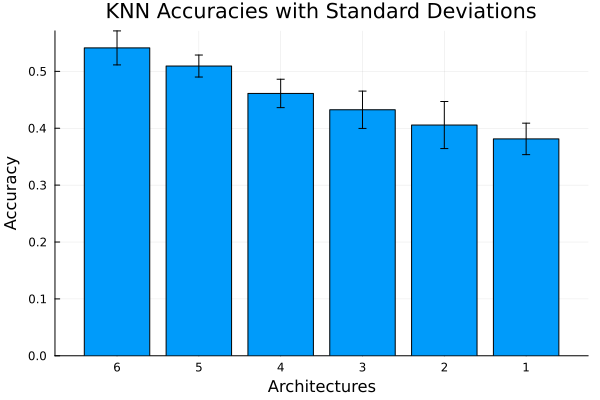

In [6]:
plot_acc_comparison(model, all_metrics)

## Discussion
In the chart, we observe that the model with more neighbors has proven to be superior in terms of accuracy. It is noticeable how the model improves as the number of neighbors is increased. However, it is evident that the best result obtained (0.541 ± 0.03) is quite insufficient. Given that the model with more neighbors has yielded the best outcome, we proceed to increase the number of neighbors.

In [7]:
hyperparameters = [
    Dict(:n_neighbors => 100),
    Dict(:n_neighbors => 120),
    Dict(:n_neighbors => 140),
    Dict(:n_neighbors => 160),
    Dict(:n_neighbors => 180),
    Dict(:n_neighbors => 200)
]

all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 6 -> 0.556 ± 0.037
Hyperparams set 5 -> 0.555 ± 0.044
Hyperparams set 4 -> 0.552 ± 0.037
Hyperparams set 3 -> 0.551 ± 0.04
Hyperparams set 1 -> 0.541 ± 0.03
Hyperparams set 2 -> 0.525 ± 0.044

----- sensitivity means -----
Hyperparams set 6 -> 0.556 ± 0.037
Hyperparams set 5 -> 0.555 ± 0.044
Hyperparams set 4 -> 0.552 ± 0.037
Hyperparams set 3 -> 0.551 ± 0.04
Hyperparams set 1 -> 0.541 ± 0.03
Hyperparams set 2 -> 0.525 ± 0.044

----- specificity means -----
Hyperparams set 5 -> 0.855 ± 0.016
Hyperparams set 6 -> 0.854 ± 0.014
Hyperparams set 4 -> 0.853 ± 0.015
Hyperparams set 3 -> 0.852 ± 0.014
Hyperparams set 1 -> 0.849 ± 0.013
Hyperparams set 2 -> 0.844 ± 0.015

----- ppv means -----
Hyperparams set 6 -> 0.617 ± 0.0

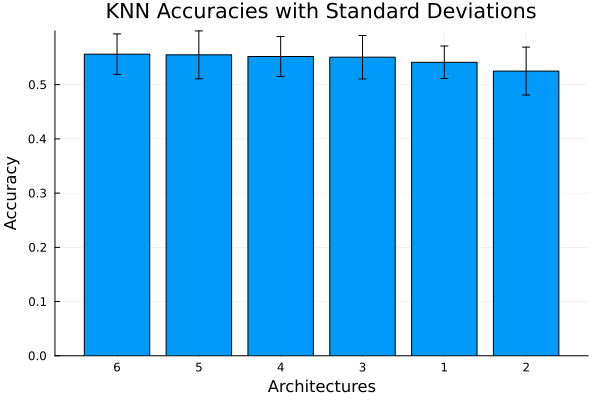

In [8]:
plot_acc_comparison(model, all_metrics)

### Discussion

The improvement from increasing the number of neighbors seems to have plateaued, and although the model with the highest precision is the one with more neighbors, the difference is minimal. Moreover, the obtained accuracy rate remains quite low. To try to improve this, we will explore using other neighbor selection metrics:

- **Mahalanobis Distance**: This distance weighs features using the inverse of the covariance matrix, which can assist in selecting better neighbors as it takes into account the correlation between variables. This metric can be especially effective in a dataset like this, where dimensionality reduction has not been performed and there is a higher likelihood of redundant features.


In [9]:
cov_matrix = cov(train_input, dims=1)
inv_cov_matrix = inv(cov_matrix)
hyperparameters = [
    Dict(:n_neighbors => 100, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix)),
    Dict(:n_neighbors => 120, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix)),
    Dict(:n_neighbors => 140, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix)),
    Dict(:n_neighbors => 160, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix)),
    Dict(:n_neighbors => 180, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix)),
    Dict(:n_neighbors => 200, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix))
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 6 -> 0.659 ± 0.036
Hyperparams set 5 -> 0.649 ± 0.043
Hyperparams set 3 -> 0.646 ± 0.042
Hyperparams set 4 -> 0.646 ± 0.046
Hyperparams set 1 -> 0.639 ± 0.027
Hyperparams set 2 -> 0.637 ± 0.037

----- sensitivity means -----
Hyperparams set 6 -> 0.659 ± 0.036
Hyperparams set 5 -> 0.649 ± 0.043
Hyperparams set 3 -> 0.646 ± 0.042
Hyperparams set 4 -> 0.646 ± 0.046
Hyperparams set 1 -> 0.639 ± 0.027
Hyperparams set 2 -> 0.637 ± 0.037

----- specificity means -----
Hyperparams set 6 -> 0.887 ± 0.013
Hyperparams set 5 -> 0.885 ± 0.014
Hyperparams set 4 -> 0.884 ± 0.015
Hyperparams set 3 -> 0.883 ± 0.014
Hyperparams set 1 -> 0.881 ± 0.01
Hyperparams set 2 -> 0.879 ± 0.012

----- ppv means -----
Hyperparams set 6 -> 0.697 ± 

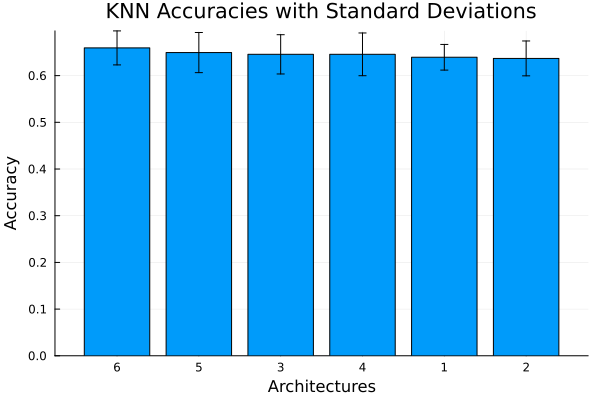

In [10]:
plot_acc_comparison(model, all_metrics)

### Discussion
There is a noticeable improvement with the use of the Mahalanobis distance. However, the accuracy still has room for improvement. The last experiment we will conduct involves weighting the influence of neighbors by distance. One of the advantages this can have, among others, is that in large neighborhoods, such as in this case, it can help to reduce the influence of distant neighbors in relation to those that are closer. In addition, along with this change, larger neighborhoods are going to be tested.

In [11]:
cov_matrix = cov(train_input, dims=1)
inv_cov_matrix = inv(cov_matrix)
hyperparameters = [
    Dict(:n_neighbors => 100, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 120, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 140, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 160, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 180, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 200, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 250, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 350, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance"),
    Dict(:n_neighbors => 360, :metric => "mahalanobis", :metric_params => Dict("VI"=>inv_cov_matrix), :weights => "distance")
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9

----- acc means -----
Hyperparams set 9 -> 0.694 ± 0.035
Hyperparams set 8 -> 0.692 ± 0.041
Hyperparams set 6 -> 0.671 ± 0.036
Hyperparams set 7 -> 0.67 ± 0.037
Hyperparams set 4 -> 0.654 ± 0.045
Hyperparams set 5 -> 0.654 ± 0.036
Hyperparams set 3 -> 0.653 ± 0.046
Hyperparams set 2 -> 0.651 ± 0.038
Hyperparams set 1 -> 0.644 ± 0.027

----- sensitivity means -----
Hyperparams set 9 -> 0.694 ± 0.035
Hyperparams set 8 -> 0.692 ± 0.041
Hyperparams set 6 -> 0.671 ± 0.036
Hyperparams set 7 -> 0.67 ± 0.037
Hyperparams set 5 -> 0.654 ± 0.036
Hyperparams set 4 -> 0.654 ± 0.045
Hyperparams set 3 -> 0.653 ± 0.046
Hyperparams set 2 -> 0.651 ± 0.038
Hy

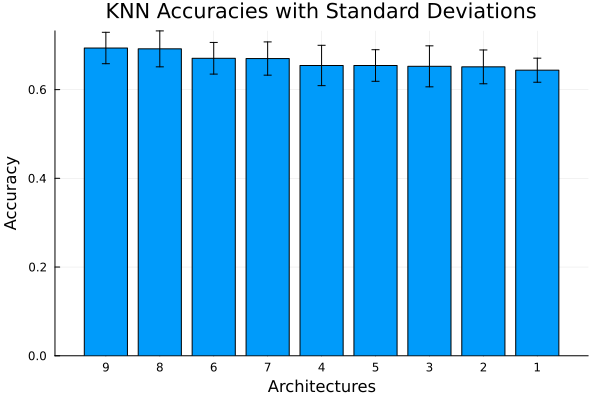

In [12]:
plot_acc_comparison(model, all_metrics)

## Final discussion

Finally, as can be seen in the graph below, the best model is obtained in the last experiment, with the following hyperparameters:

1. **Neighbors**: 360
2. **Metric**: "Mahalanobis"
3. **Weights**: "distance"

This results in an accuracy of **0.694 ± 0.035**. Despite having achieved a considerable increase in accuracy compared to the first experiment, the performance demonstrated by the KNN models on this problem is quite modest. We suspect that the large number of features in this dataset could be impairing the performance of the KNN, as it is an algorithm highly sensitive to irrelevant features.

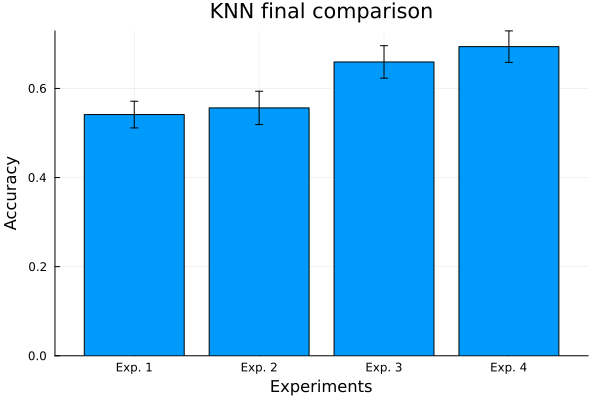

In [13]:
plot_final_comparison("KNN final comparison", best_models_acc)